# **Classification - Breast Cancer Dataset**
---

## 1. Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

In [2]:
data = load_breast_cancer()  
X = data.data  
y = data.target  

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)  
df['target'] = y  

#### head() provides a quick view of the data and the first few rows.

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### isnull().sum() checks for missing values, which can affect model training if not handled.

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

#### duplicated().sum() identifies any duplicate records, which can skew results.

In [6]:
df.duplicated().sum()

0

#### info() gives information about data types and non-null counts.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### describe() summarizes statistics for numerical columns, giving insights into data distribution.

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### shape confirms the number of rows and columns in the dataset.

In [9]:
df.shape

(569, 31)

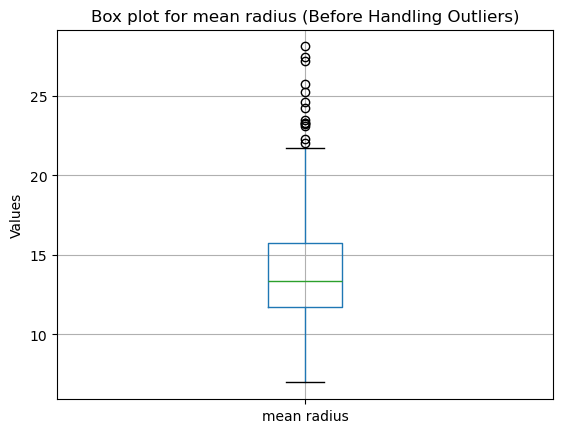

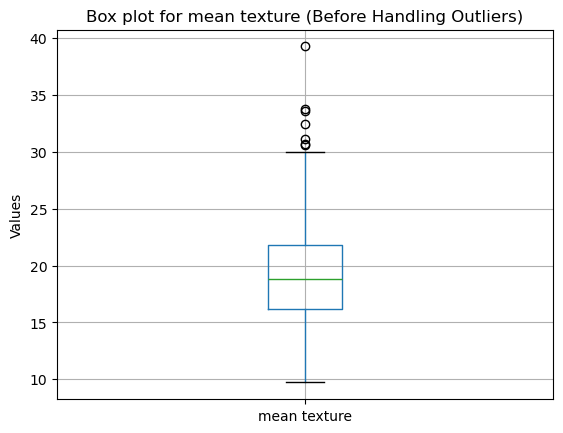

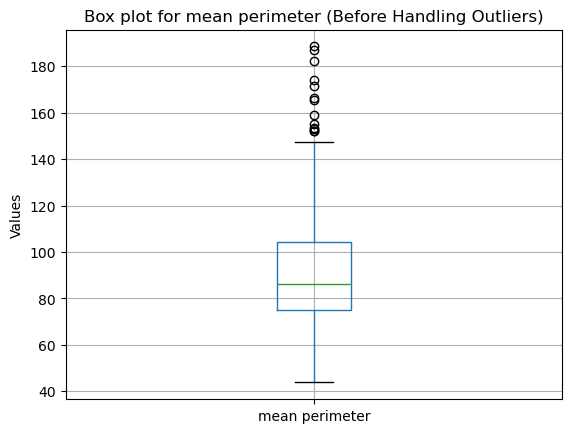

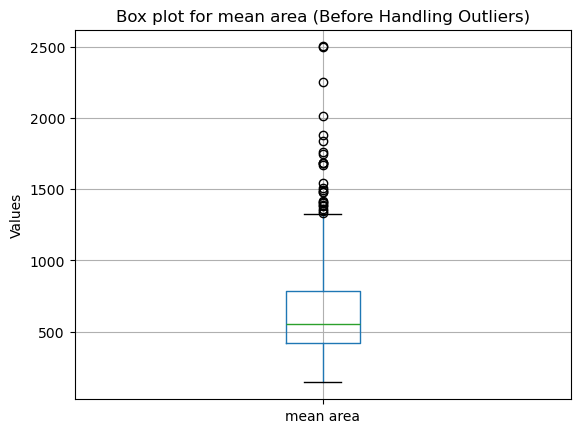

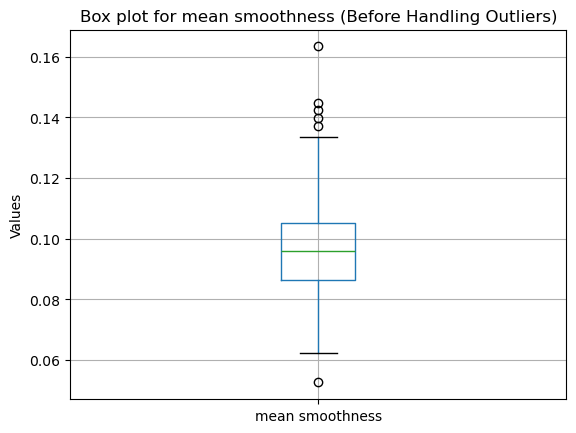

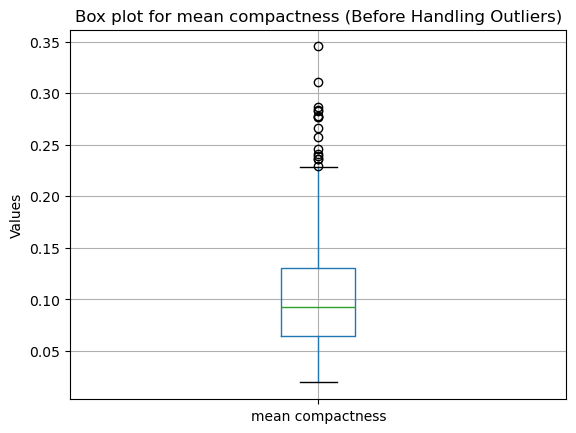

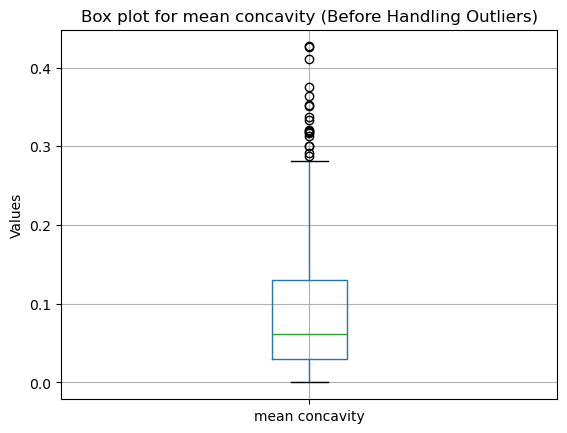

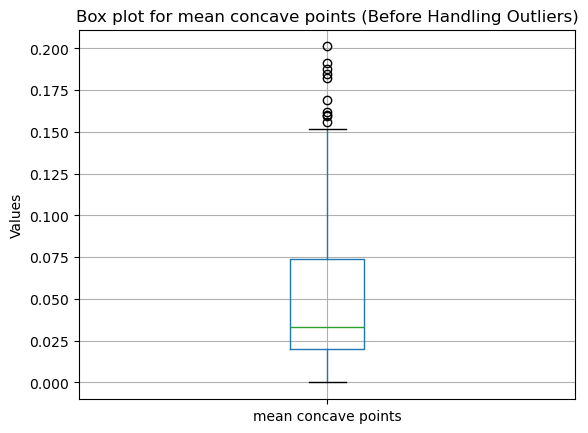

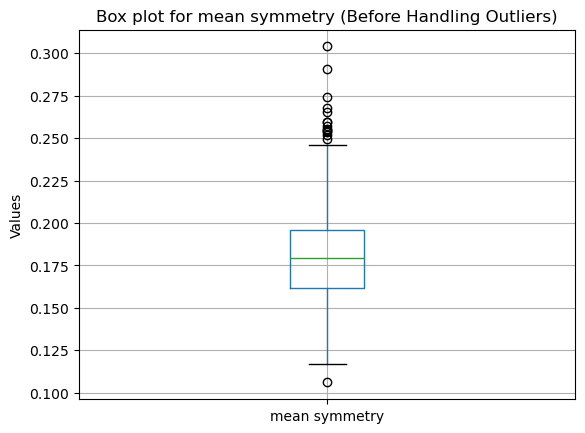

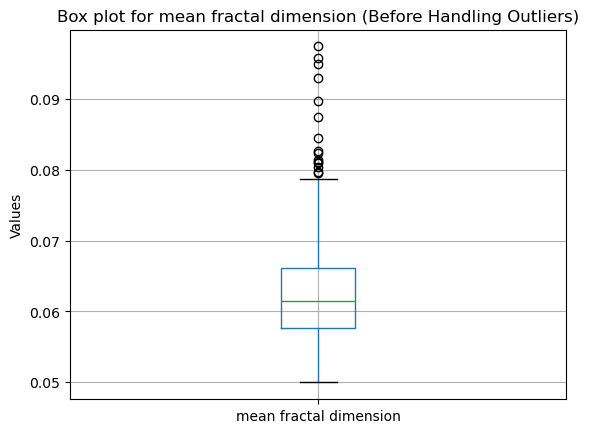

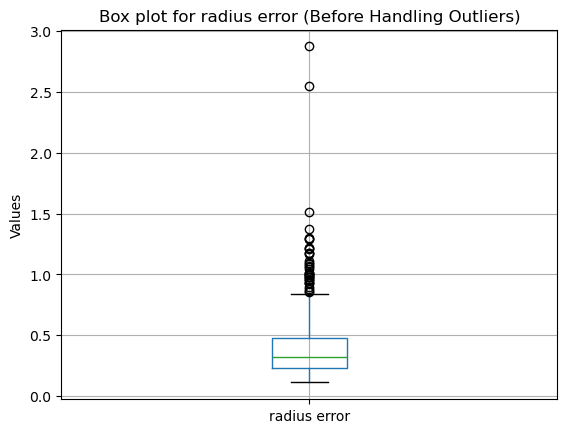

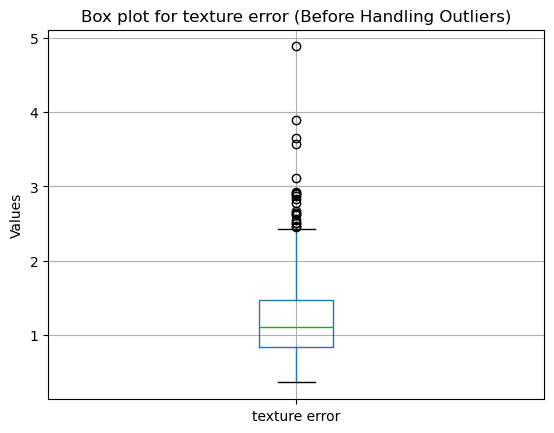

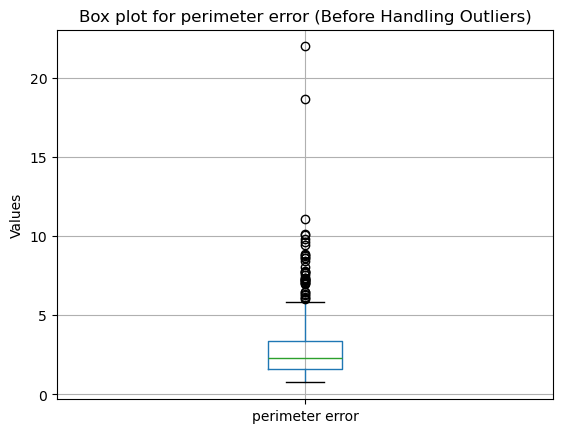

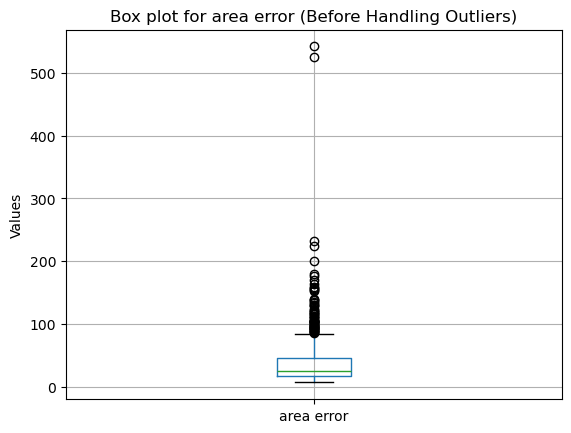

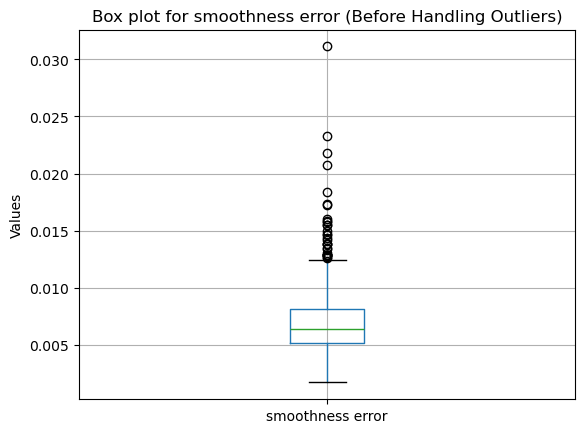

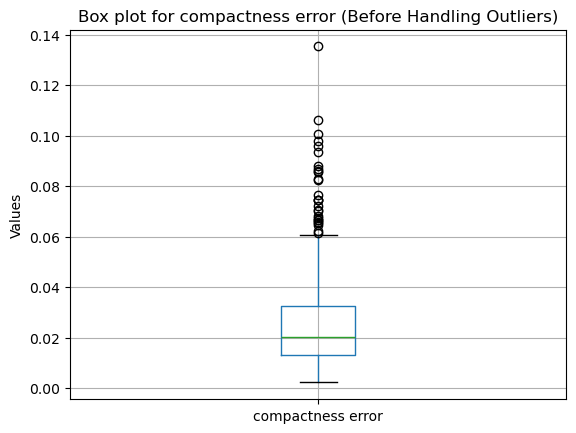

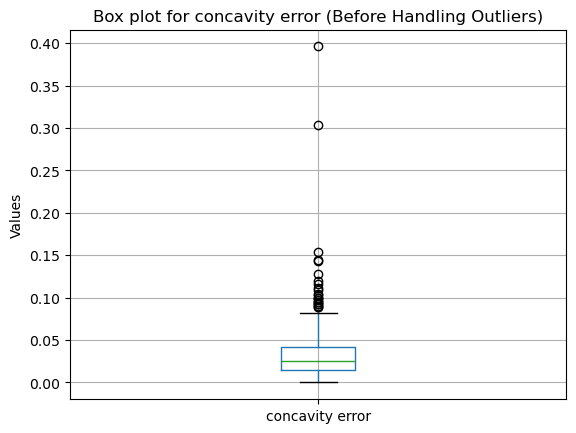

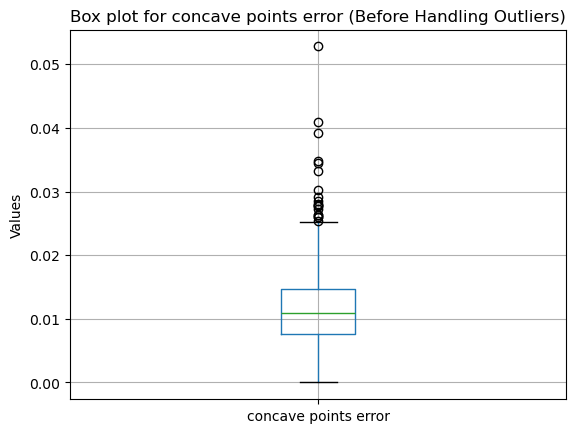

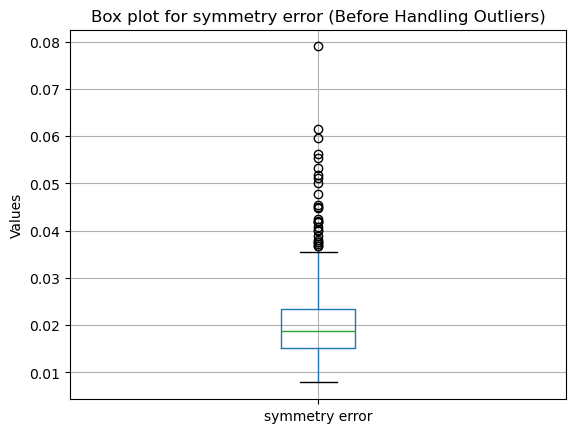

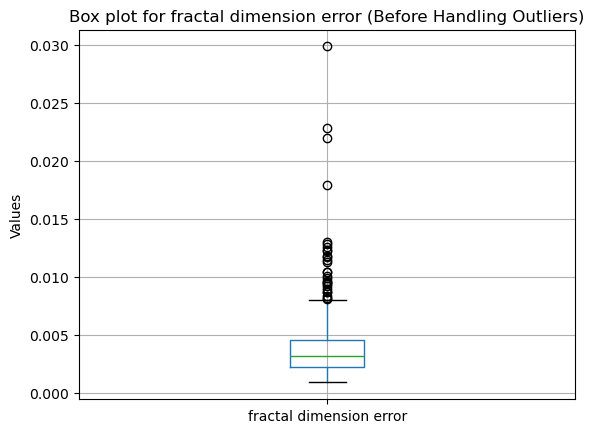

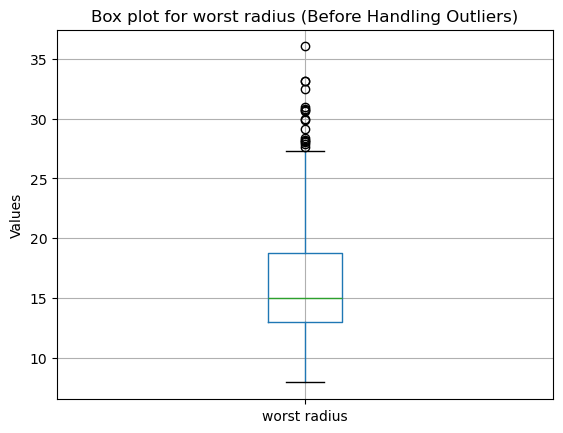

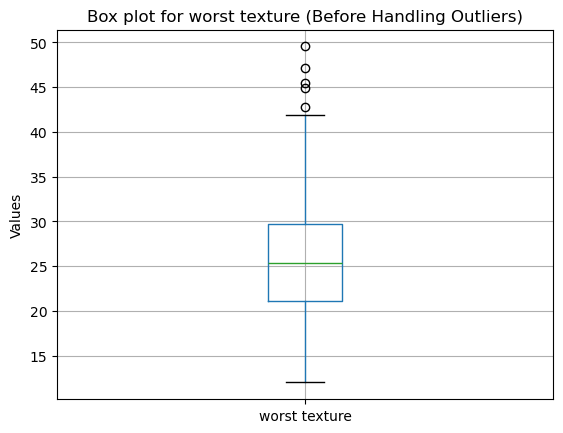

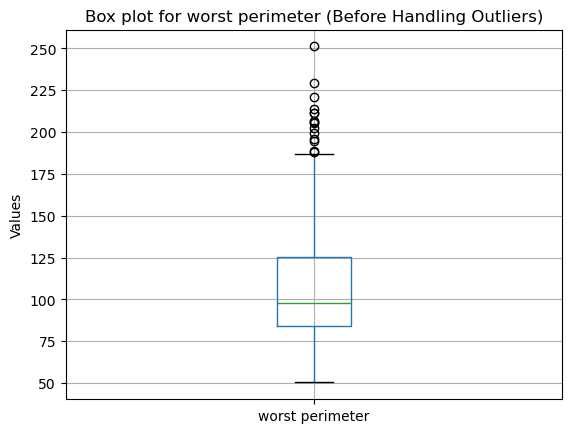

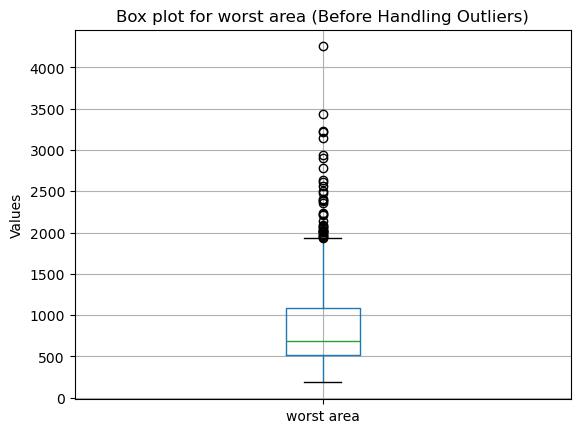

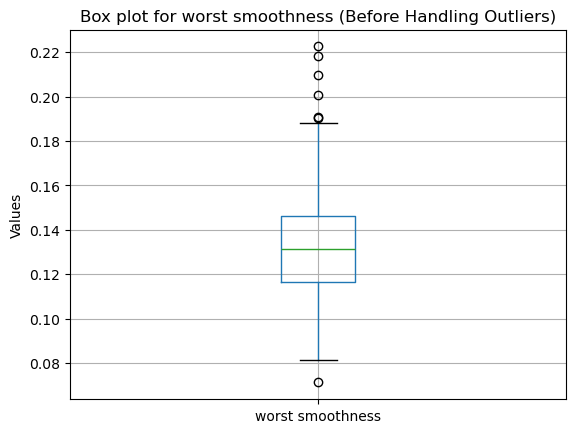

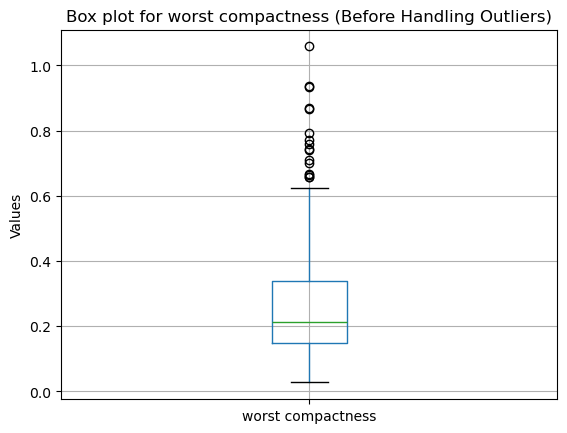

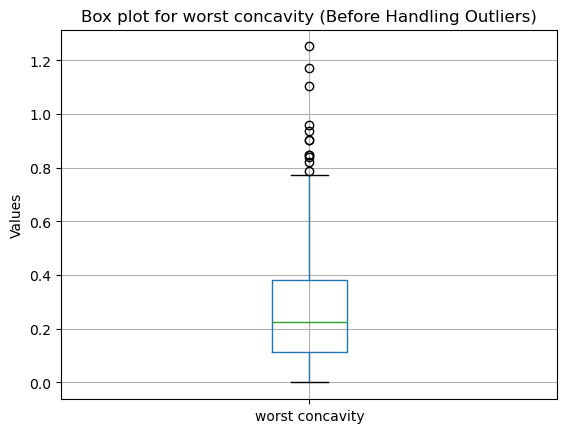

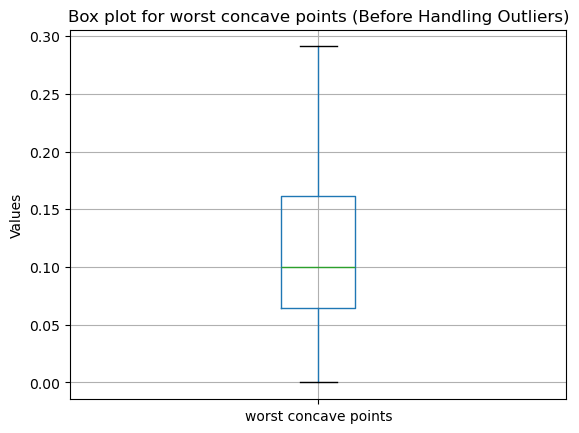

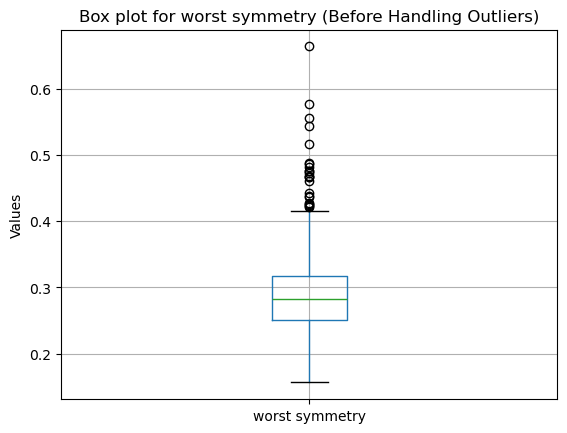

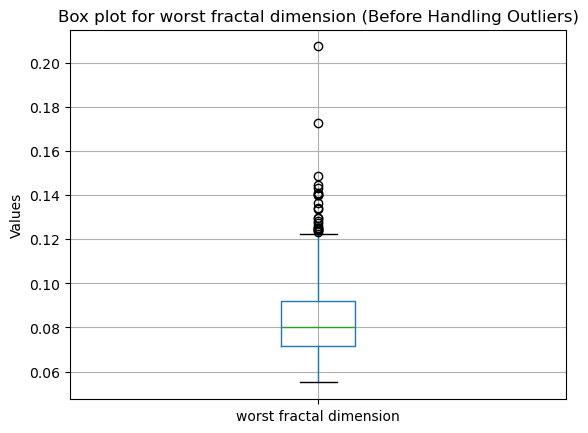

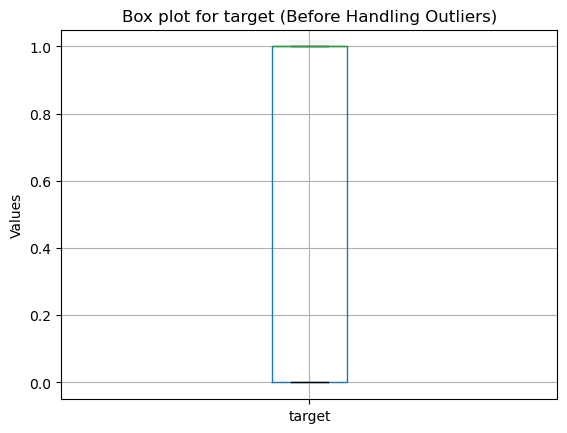

In [10]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (Before Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

In [11]:
def handle_outlier(df):
    
    df = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        
        df[column] = df[column].apply(lambda x: 
                                      lower if x < lower else 
                                      upper if x > upper else x)
    return df

##### Outliers can have a disproportionate effect on model performance, skewing results and reducing reliability. This step uses the interquartile range (IQR) method to identify and cap outliers, thus helping to normalize the distribution of the data, leading to more robust models.

In [12]:
df1 = handle_outlier(df)

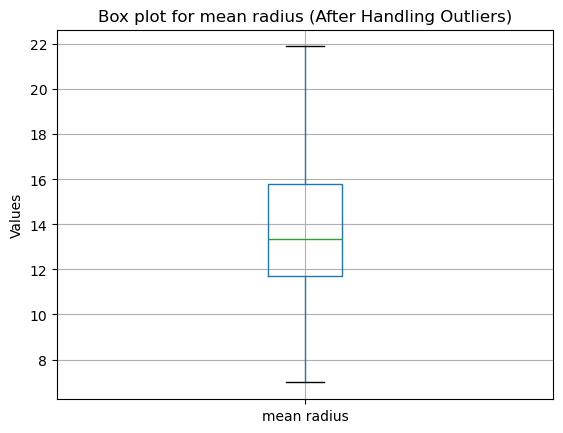

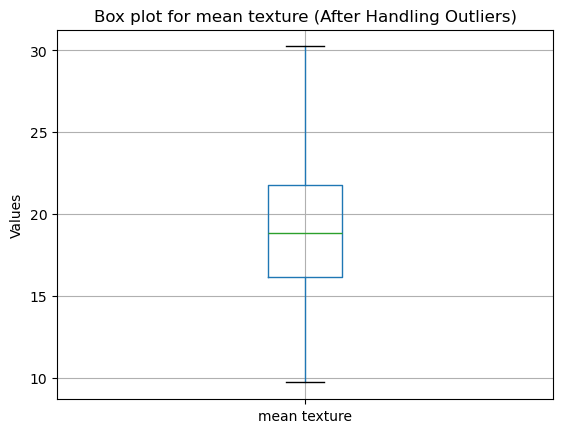

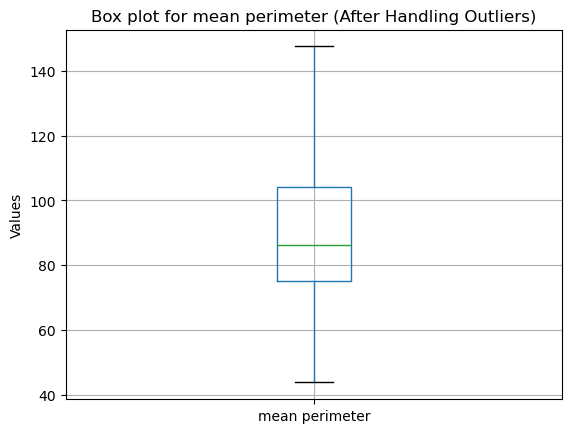

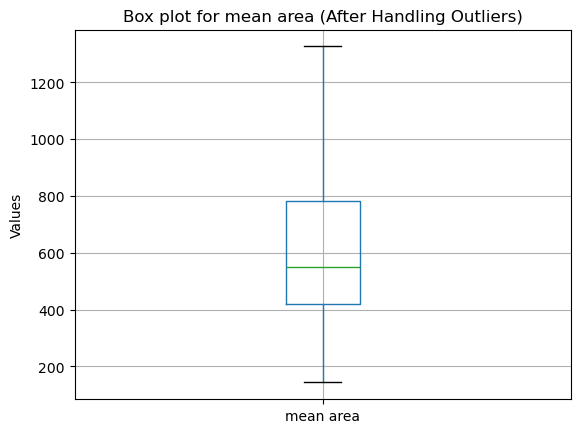

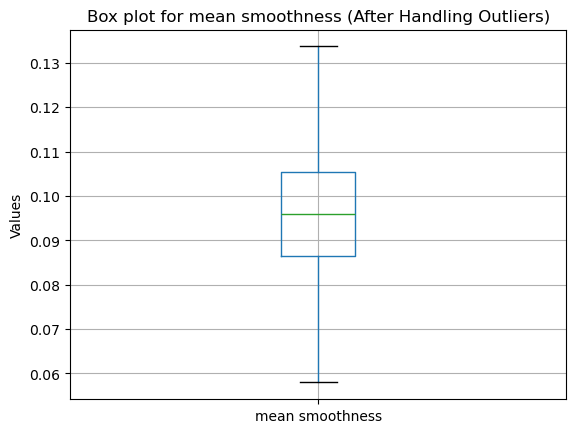

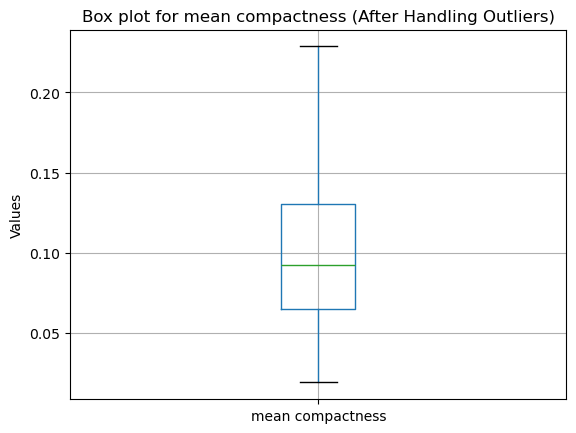

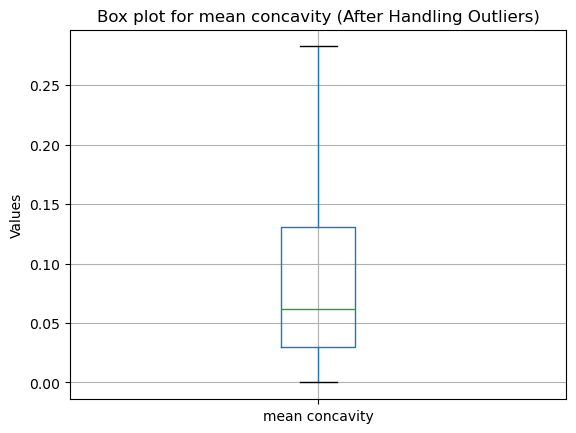

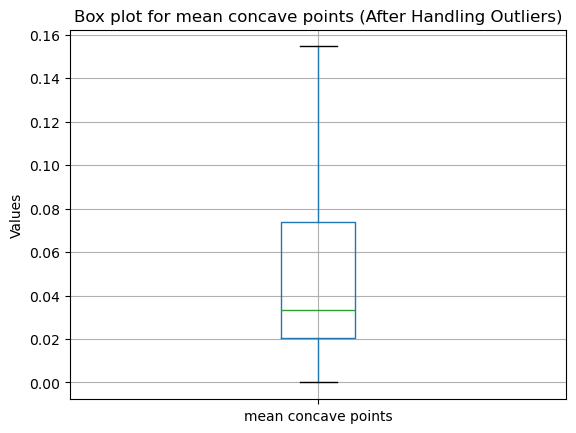

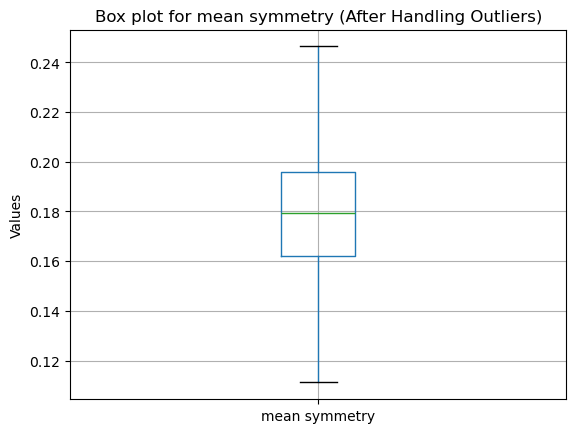

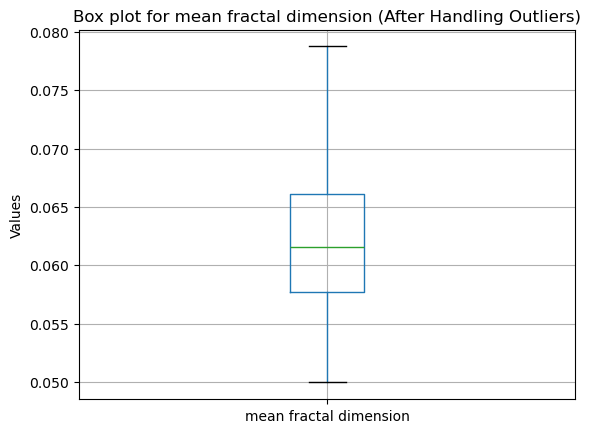

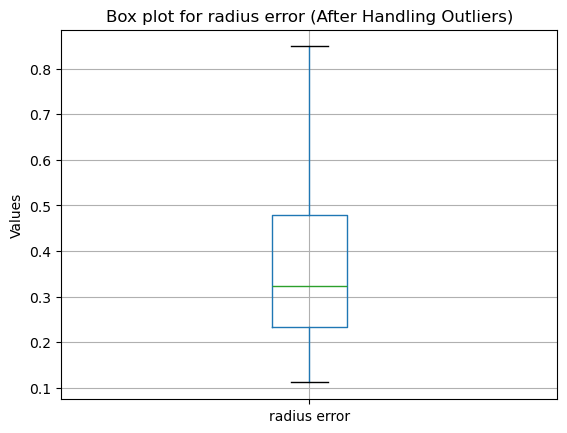

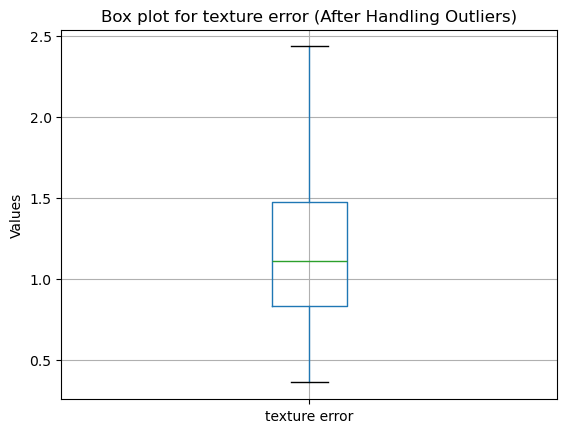

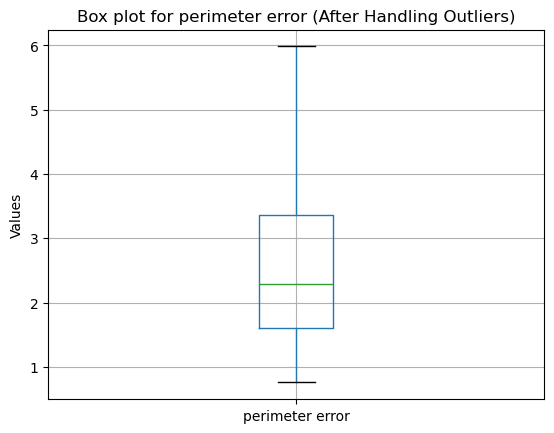

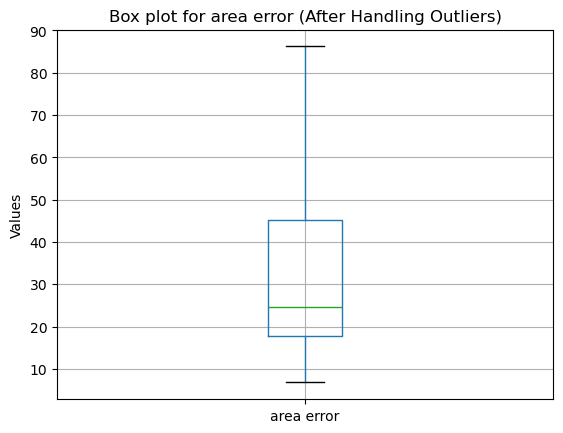

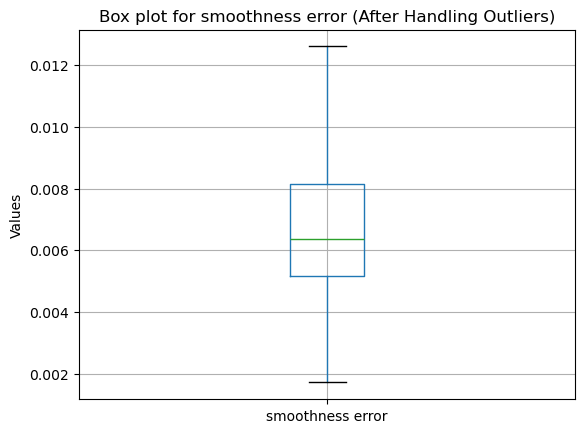

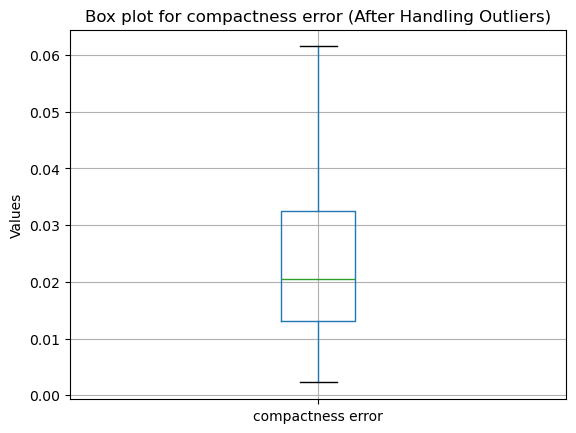

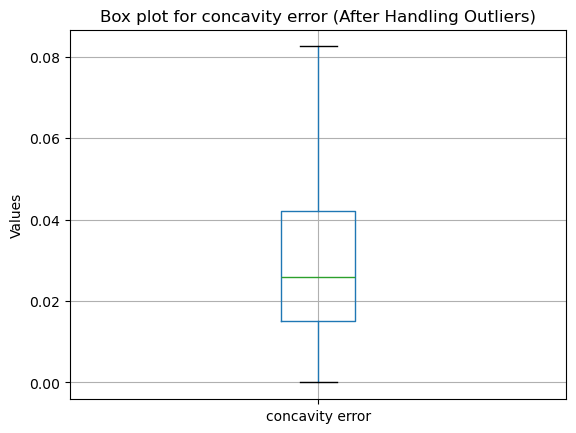

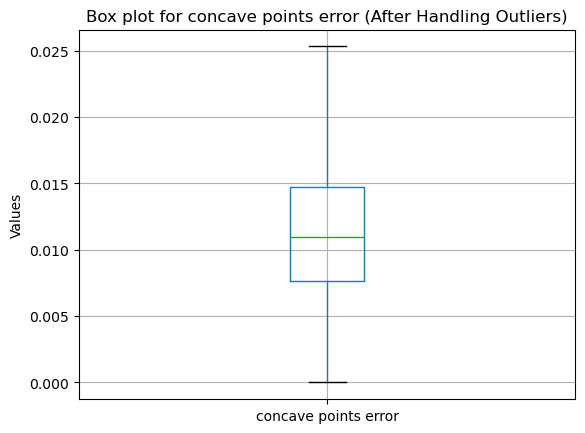

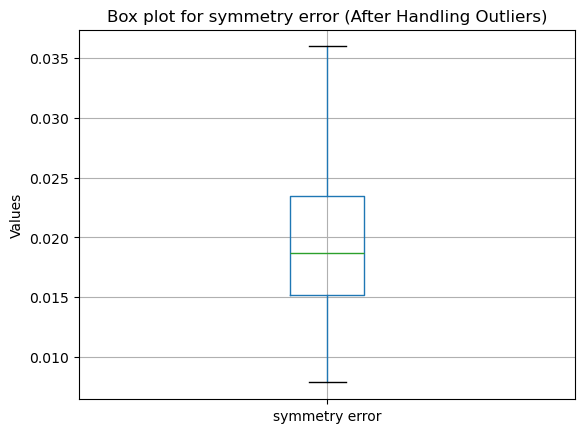

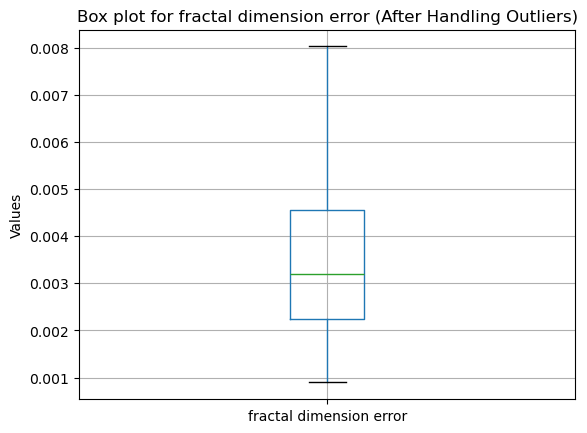

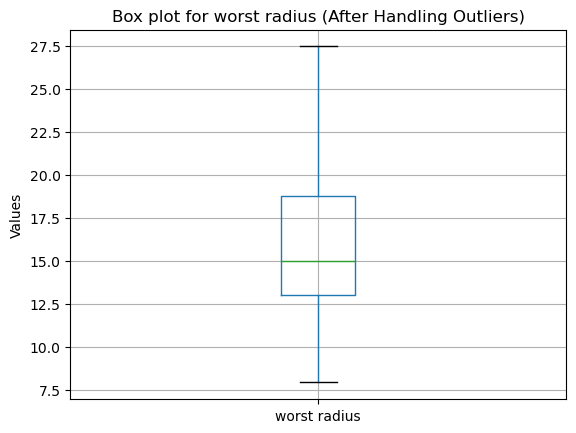

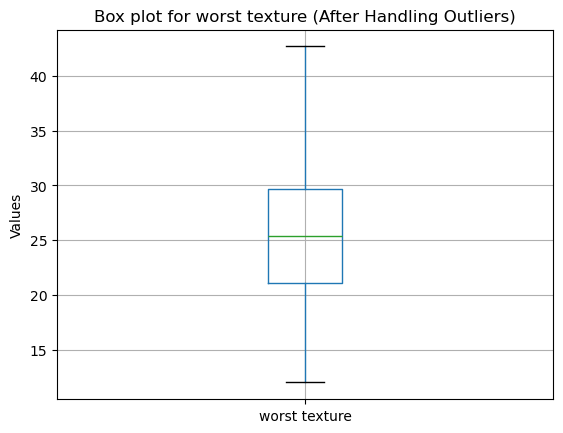

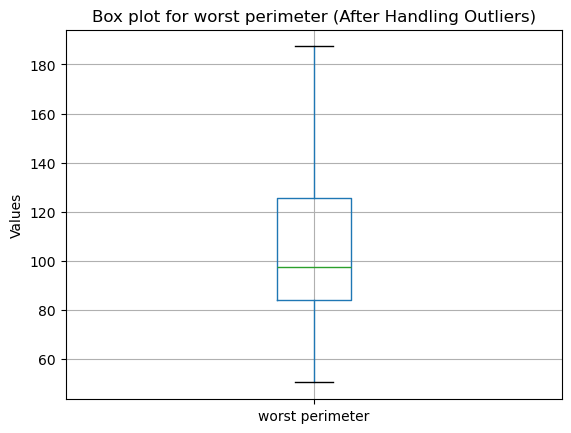

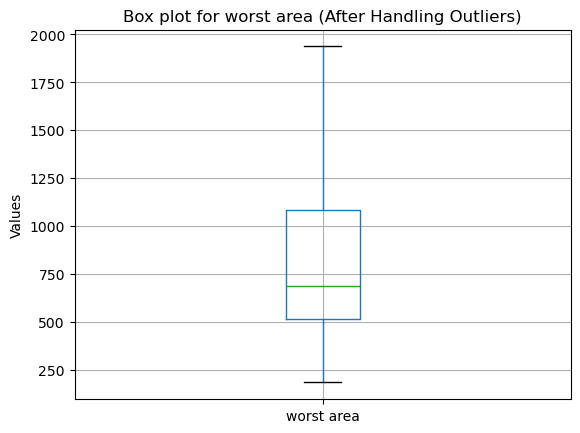

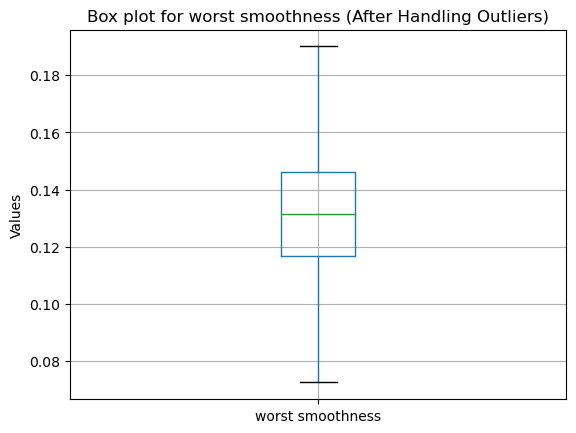

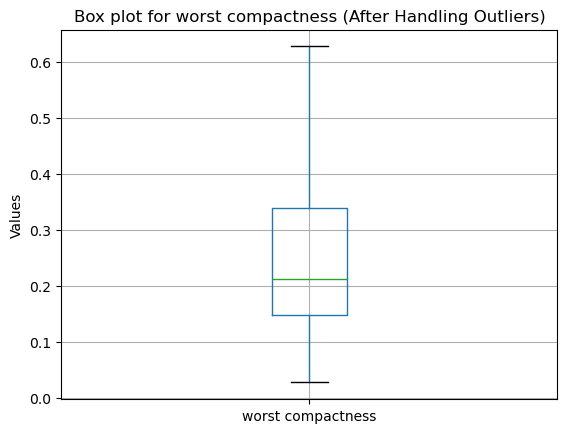

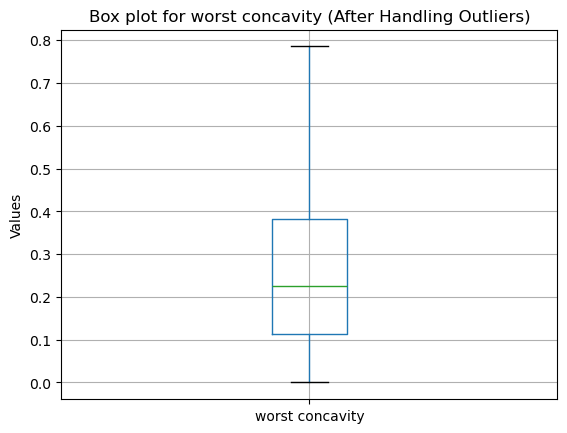

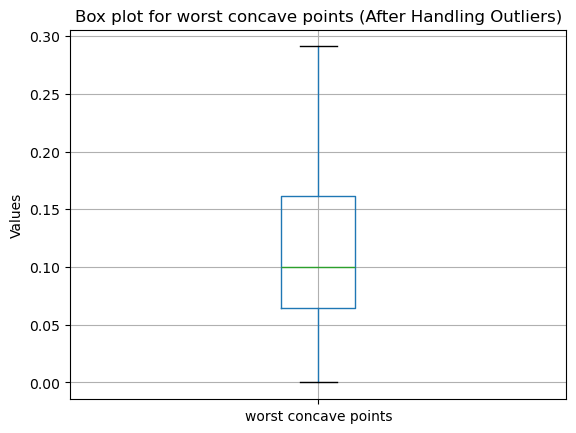

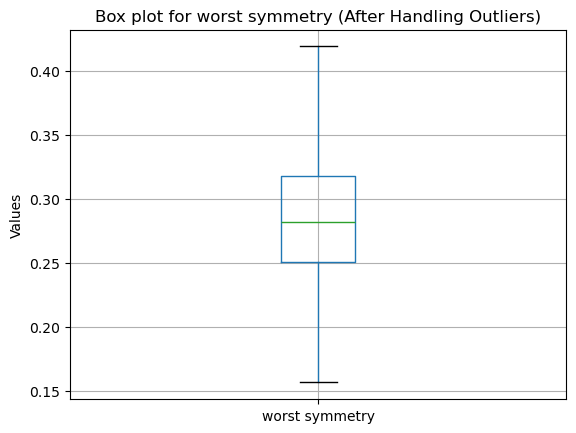

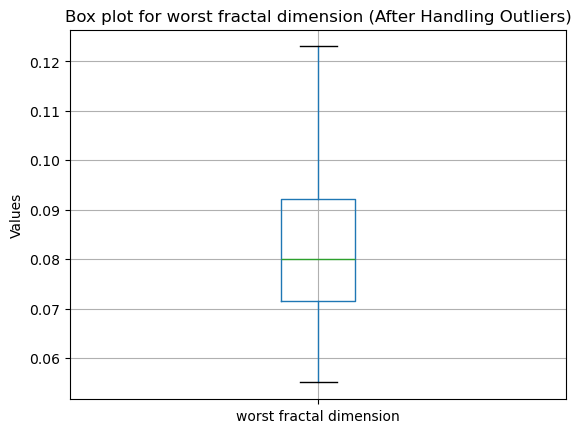

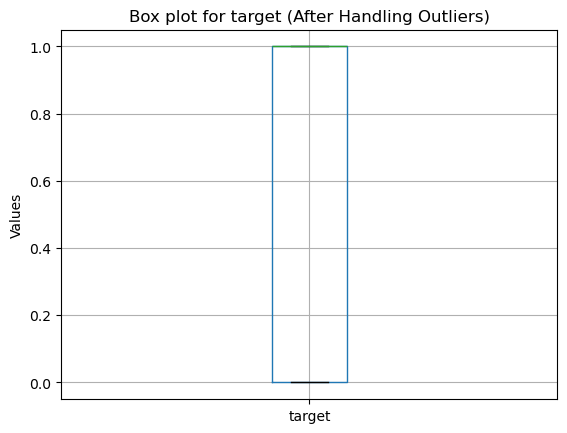

In [13]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (After Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

##### This step verifies that the outliers have been addressed. A second round of boxplots confirms whether the distribution looks healthier and whether any remaining unusual data points could still affect model training.

In [14]:
from scipy.stats import skew

In [15]:
skewness = numeric_columns.apply(lambda x: skew(x.dropna()))
print("Skewness of numeric columns:\n", skewness)

Skewness of numeric columns:
 mean radius                0.654222
mean texture               0.448514
mean perimeter             0.699231
mean area                  0.920449
mean smoothness            0.257032
mean compactness           0.824574
mean concavity             1.021158
mean concave points        1.001400
mean symmetry              0.402557
mean fractal dimension     0.680629
radius error               1.022327
texture error              0.739032
perimeter error            1.031660
area error                 1.127956
smoothness error           0.778863
compactness error          0.987673
concavity error            0.914322
concave points error       0.538147
symmetry error             0.867003
fractal dimension error    0.976761
worst radius               0.847537
worst texture              0.385837
worst perimeter            0.872562
worst area                 1.046203
worst smoothness           0.246547
worst compactness          0.912880
worst concavity            0.80703

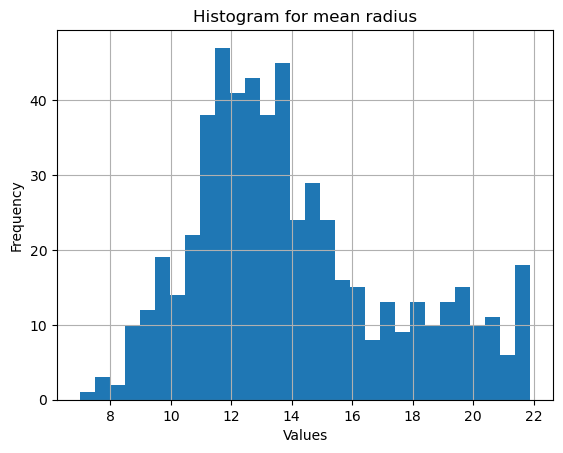

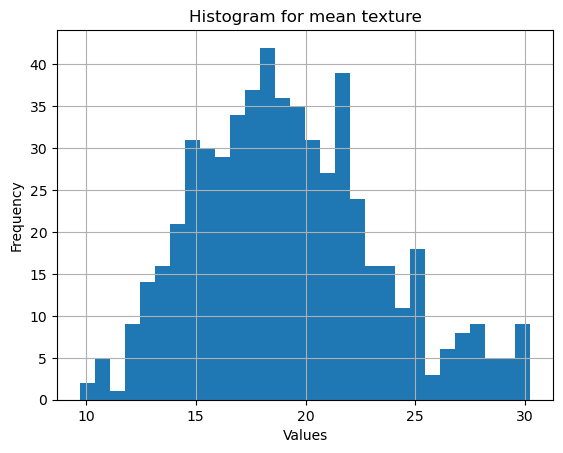

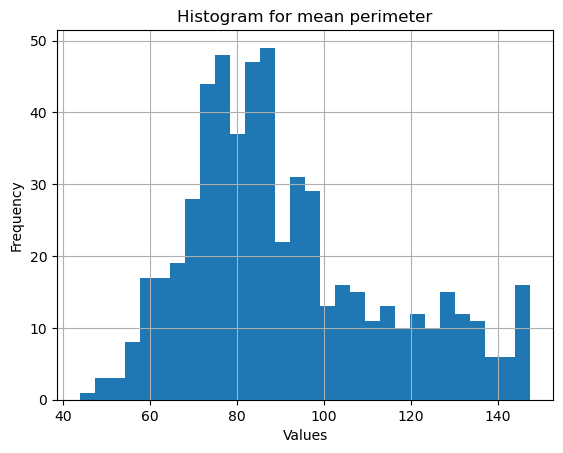

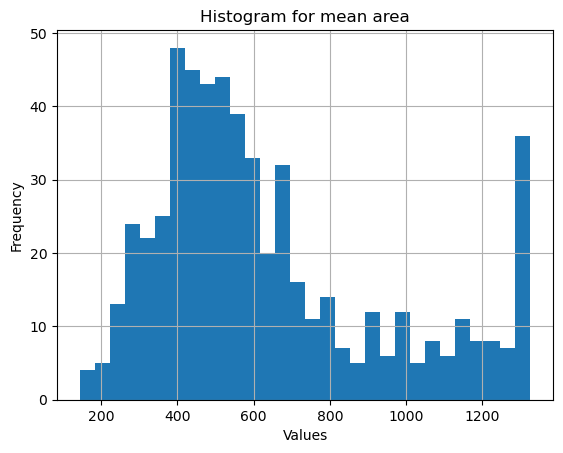

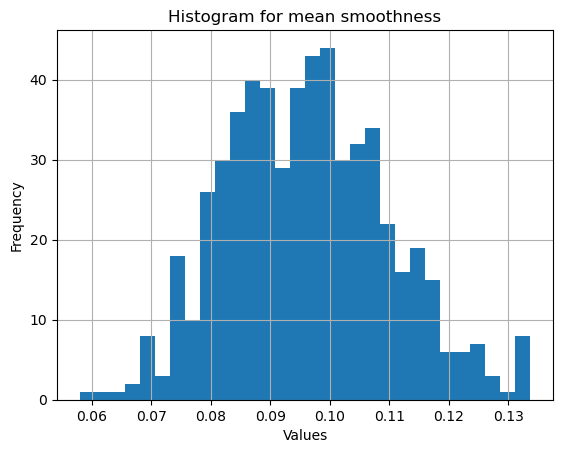

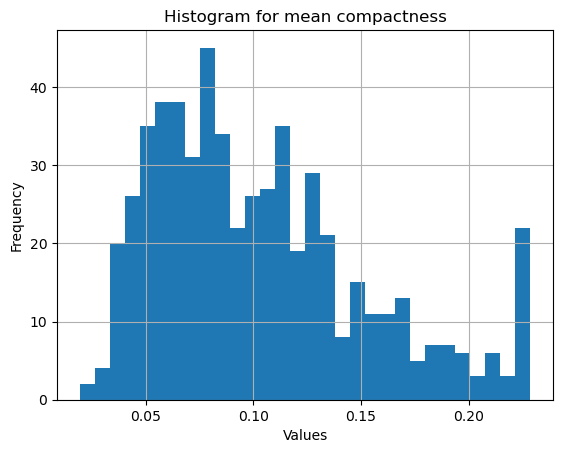

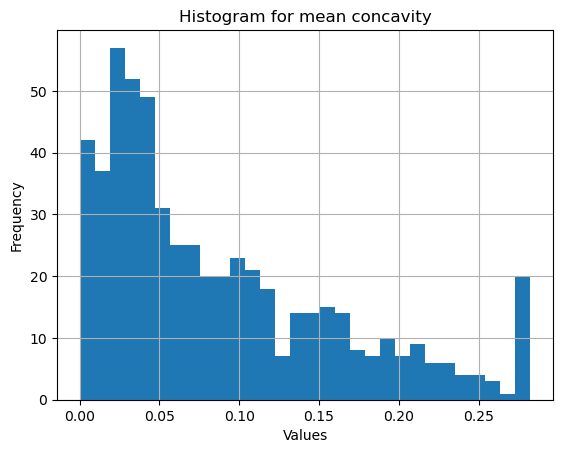

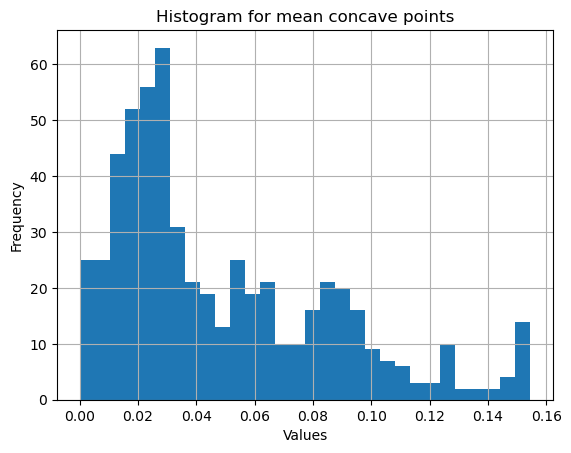

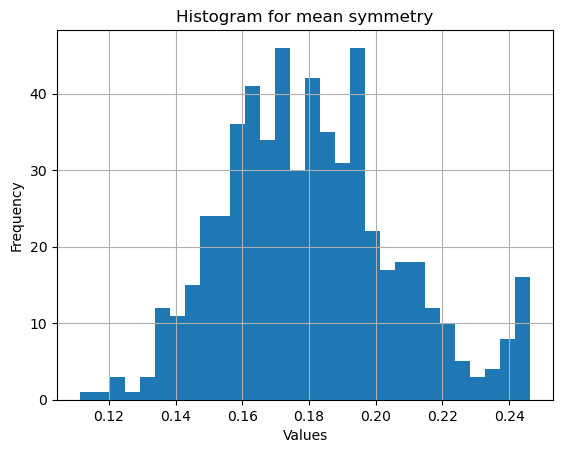

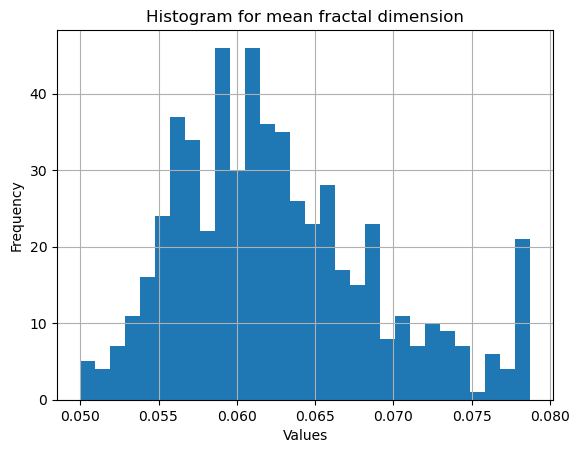

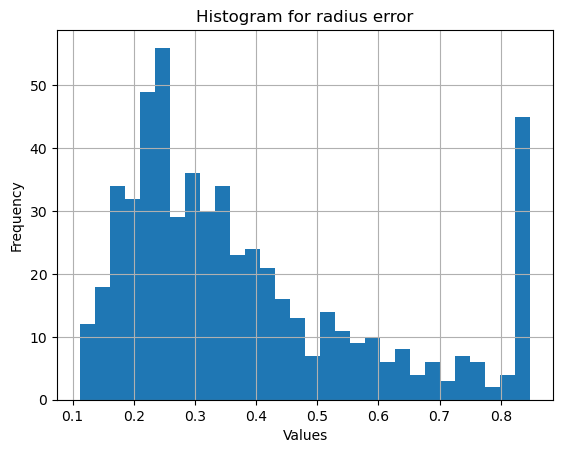

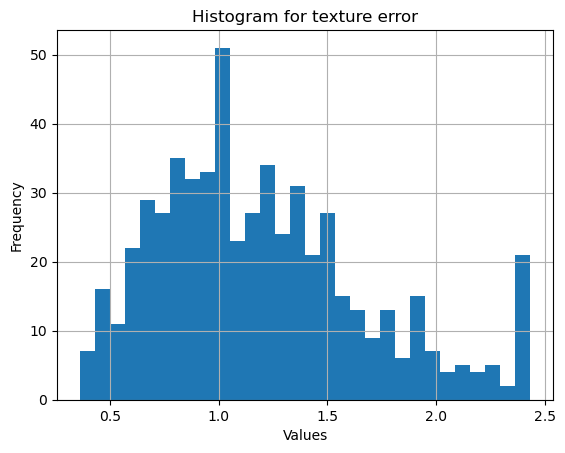

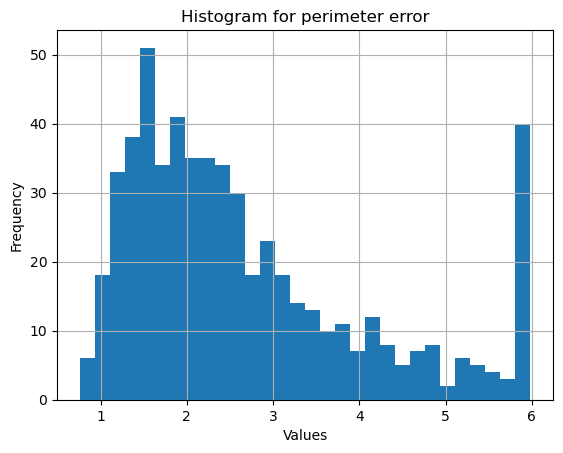

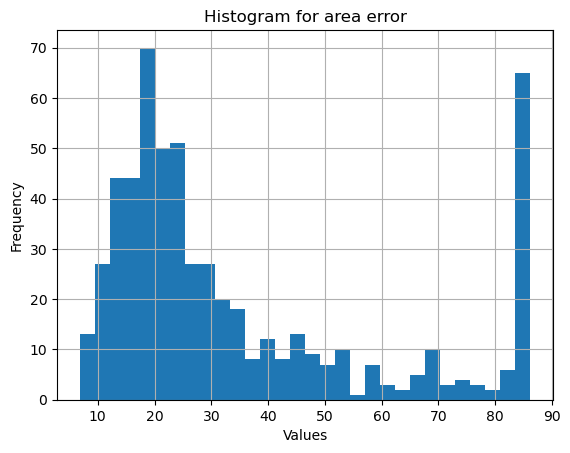

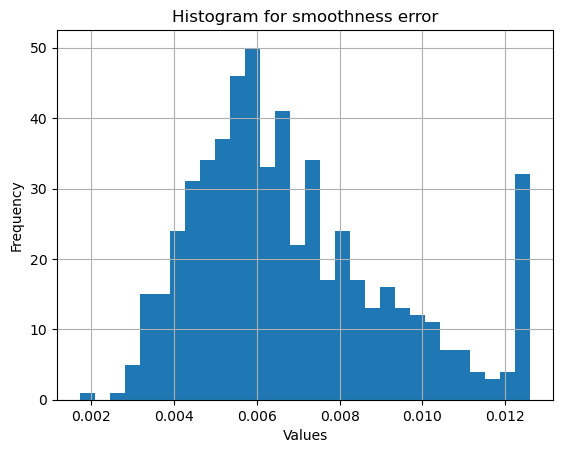

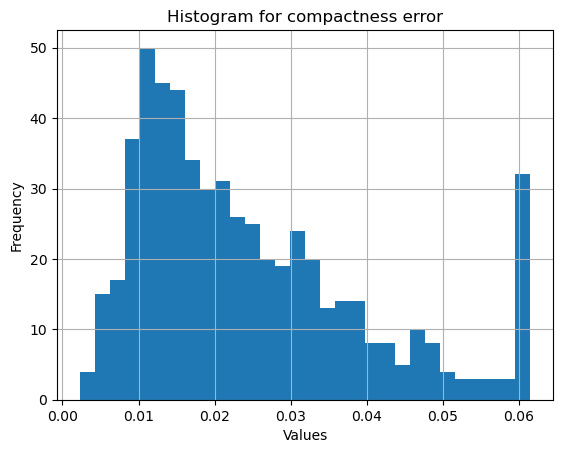

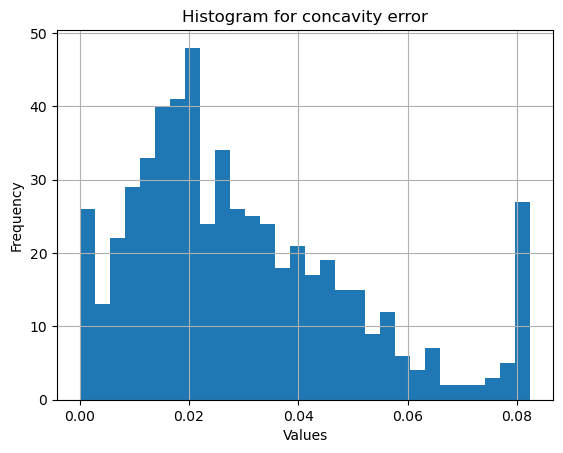

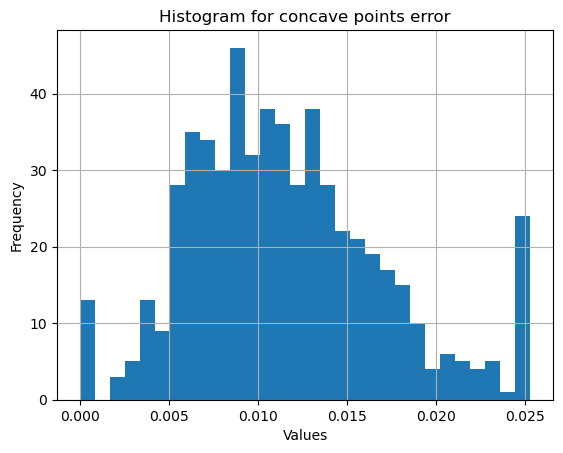

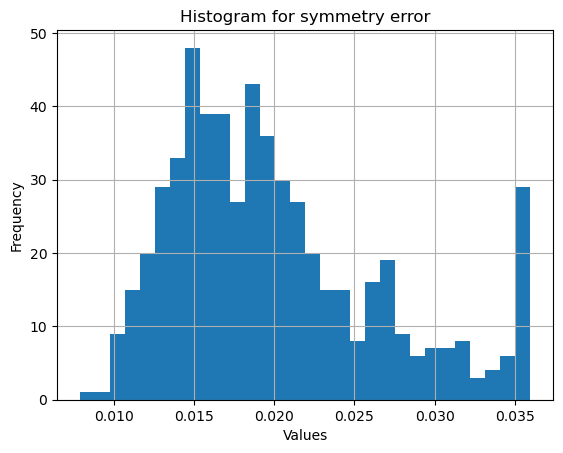

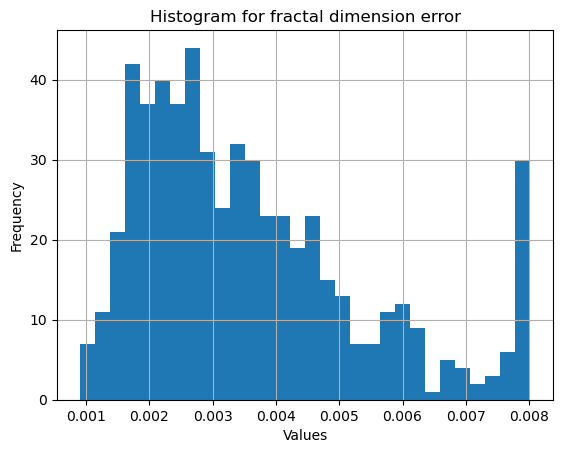

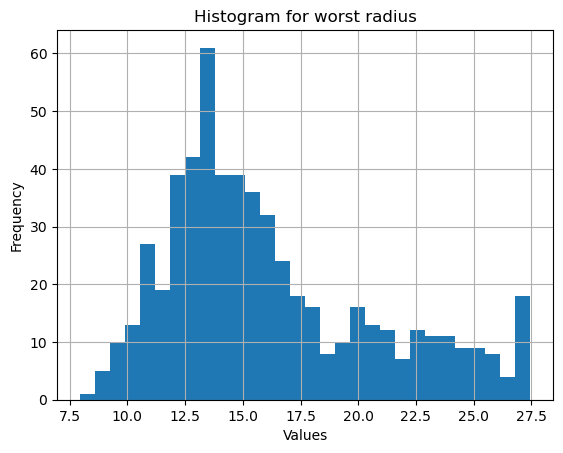

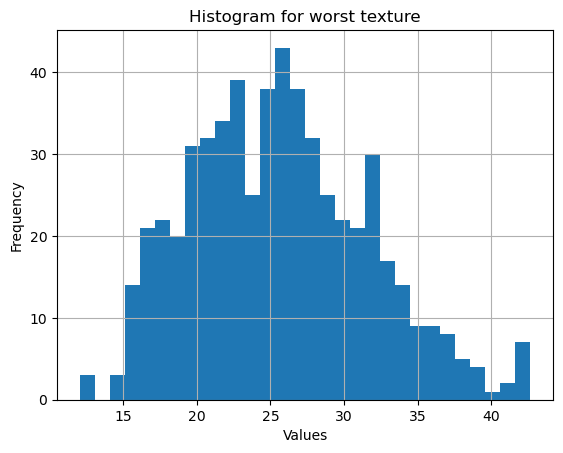

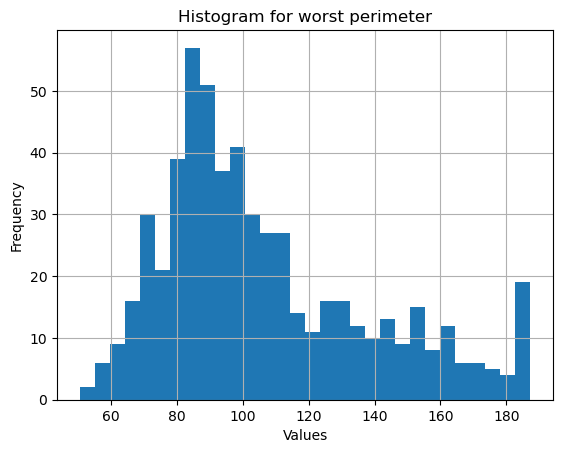

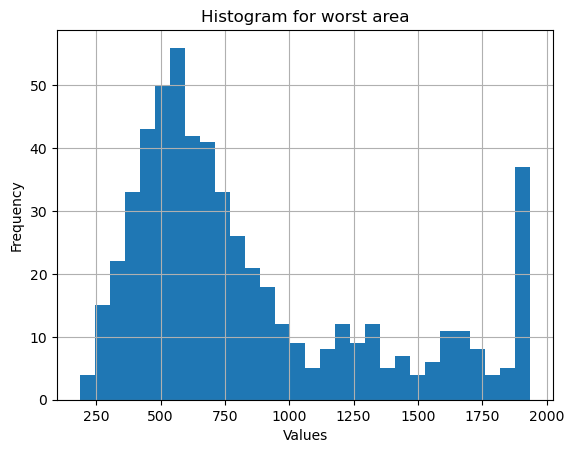

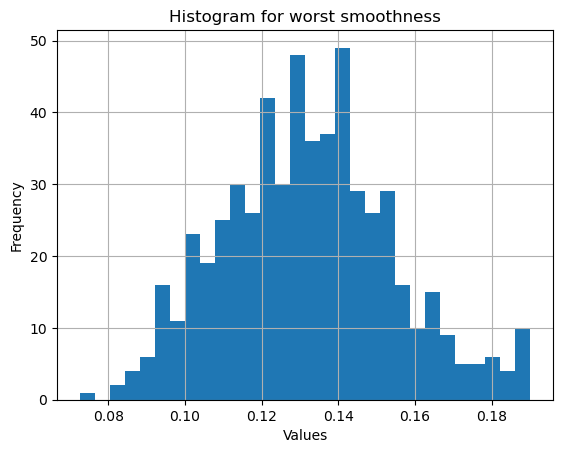

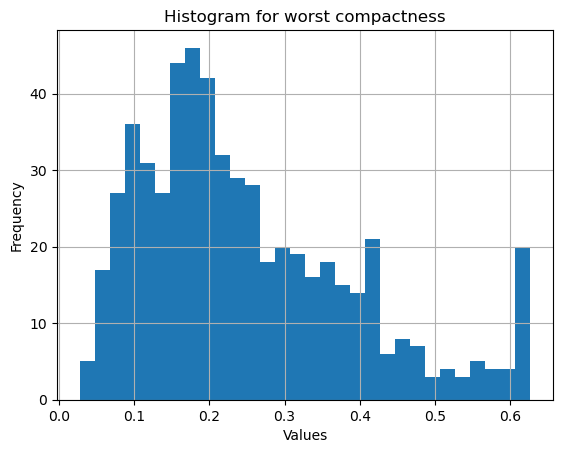

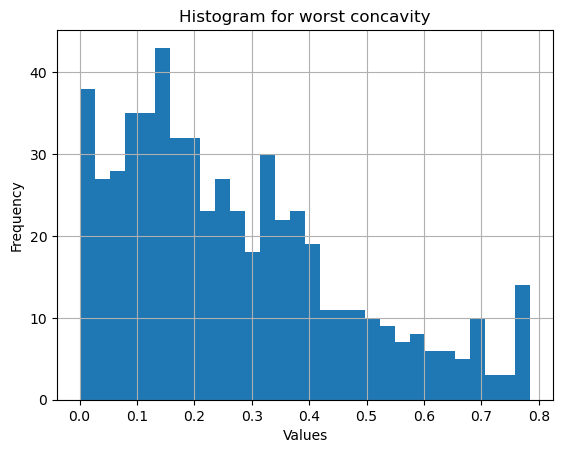

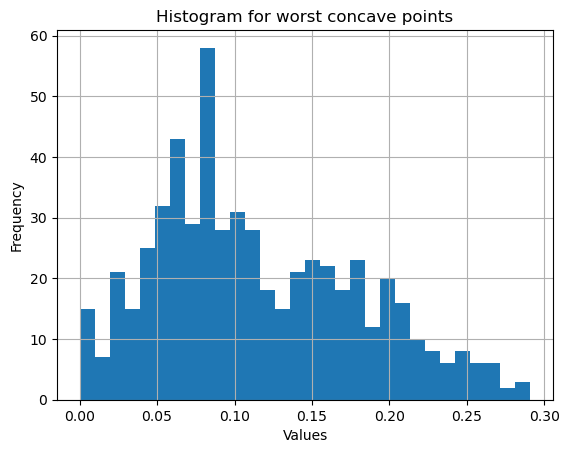

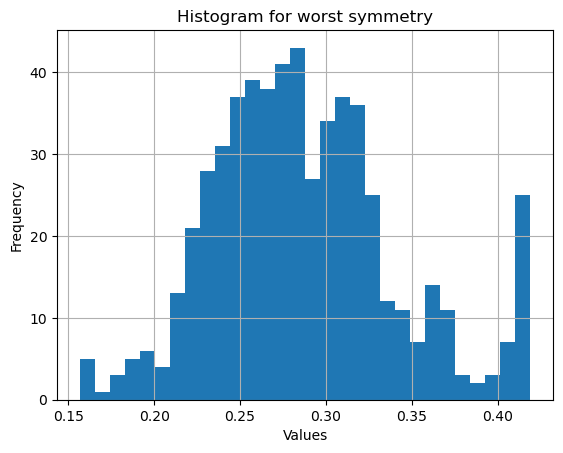

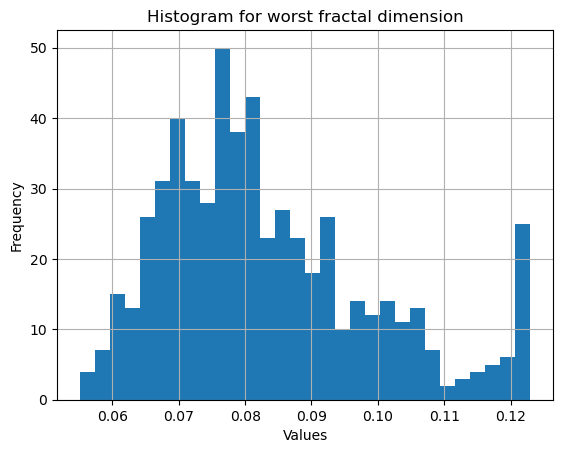

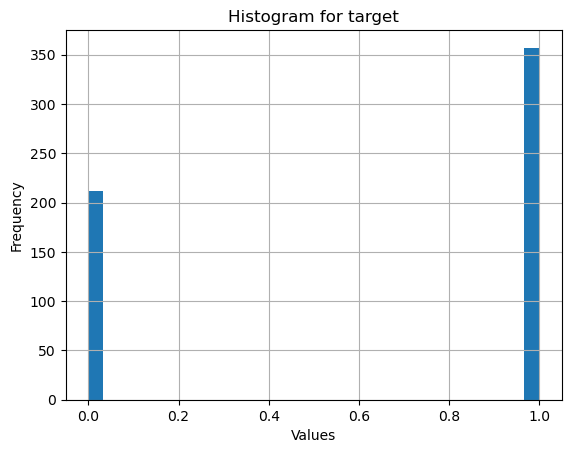

In [16]:
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns[column].hist(bins=30)
    plt.title(f"Histogram for {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

In [17]:
numeric_data = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


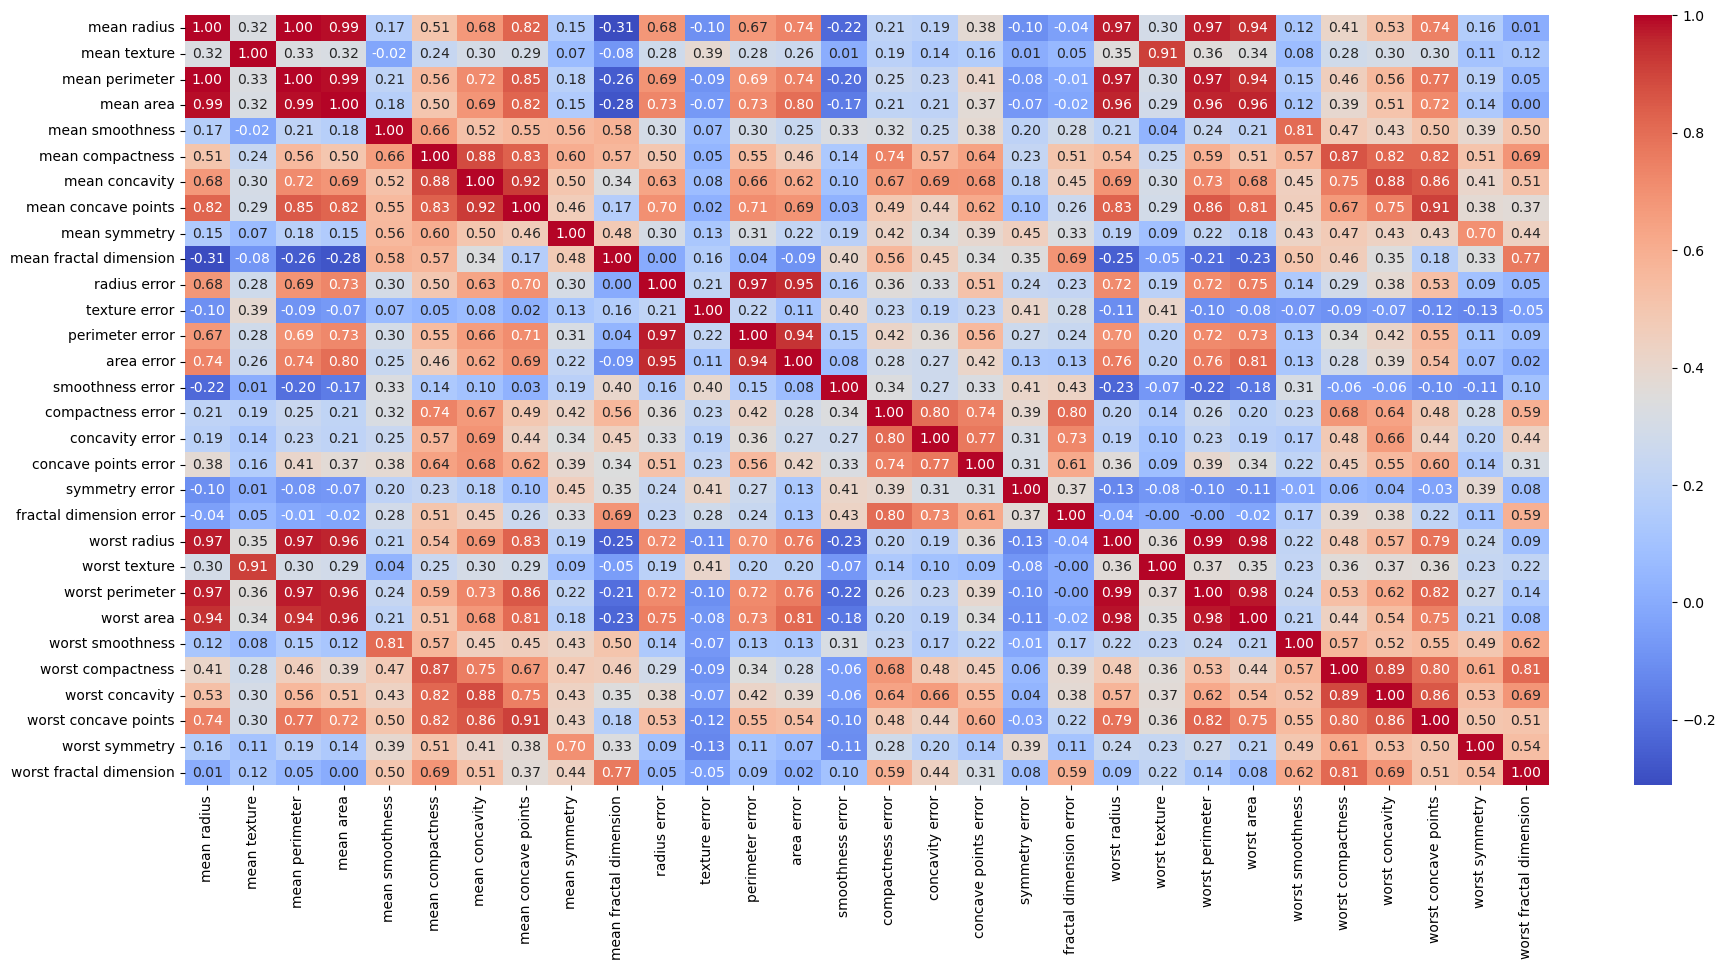

In [18]:
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [19]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index([], dtype='object')


In [20]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Shape after encoding:\n", df_encoded.shape)

Shape after encoding:
 (569, 31)


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

In [22]:
sk = SelectKBest(score_func=mutual_info_classif,k=10)
x_sk = sk.fit_transform(X,y)

In [23]:
x_sk

array([[1.799e+01, 1.228e+02, 1.001e+03, ..., 1.846e+02, 2.019e+03,
        2.654e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, ..., 1.588e+02, 1.956e+03,
        1.860e-01],
       [1.969e+01, 1.300e+02, 1.203e+03, ..., 1.525e+02, 1.709e+03,
        2.430e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, ..., 1.267e+02, 1.124e+03,
        1.418e-01],
       [2.060e+01, 1.401e+02, 1.265e+03, ..., 1.846e+02, 1.821e+03,
        2.650e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, ..., 5.916e+01, 2.686e+02,
        0.000e+00]])

##### Feature selection reduces the number of input variables to the most relevant ones, enhancing model performance and reducing computation time. This step helps prevent overfitting and improves model interpretability.

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)
X_scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Splitting the dataset into training and testing sets is essential to evaluate the model's ability to generalize to unseen data. This prevents overfitting, allowing for a fair assessment of the model's performance.

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##### Feature scaling standardizes the features to have a mean of 0 and a standard deviation of 1. Many algorithms  are sensitive to the scale of input features. Without scaling, features with larger ranges could disproportionately influence the model's performance.

## 2. Classification Algorithm Implementation 

### 1. Logistic Regression

In [28]:
model1 = LogisticRegression()
model1.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = model1.predict(X_test_scaled)

In [30]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [31]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [32]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9824561403508771

In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9825


In [34]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  2],
       [ 0, 71]], dtype=int64)

<Axes: >

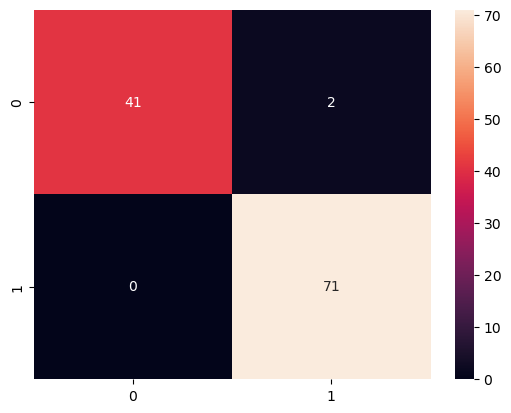

In [36]:
sns.heatmap(cm,annot=True)

#### Description: Logistic regression is a linear model used for binary classification. It estimates the probability that a given input point belongs to a certain class. It is suitable for this dataset due to its interpretability and efficiency.

### 2. Decision Tree Classifier

In [37]:
model_2 = DecisionTreeClassifier(random_state = 42, max_depth = 10)
model_2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [38]:
y_pred_dt = model_2.predict(X_test_scaled)

In [39]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.9210526315789473

In [40]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [41]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[37,  6],
       [ 3, 68]], dtype=int64)

<Axes: >

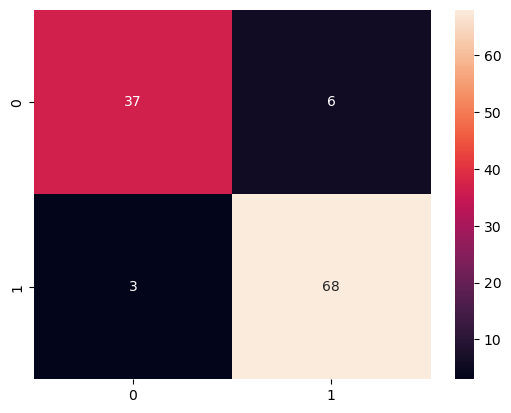

In [42]:
sns.heatmap(cm_dt,annot=True)

#### Description: Decision trees split the data into subsets based on feature values, creating a tree-like model. They are interpretable and can handle non-linear relationships, making them suitable for this dataset.

### 3. Random Forest Classifier

In [43]:
rf_model = RandomForestClassifier(max_depth = 10,random_state=42,)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [45]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.631578947368421

In [46]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.63      1.00      0.77        71

    accuracy                           0.63       114
   macro avg       0.81      0.51      0.41       114
weighted avg       0.77      0.63      0.50       114



#### Description: Random forests are an ensemble of decision trees that improve accuracy and reduce overfitting. They are robust and handle a variety of data types well.

### 4. Support Vector Machine (SVM)

In [47]:
model_3 = SVC(probability=True)
model_3.fit(X_train,y_train)

SVC(probability=True)

In [48]:
y_pred_svc = model_3.predict(X_test)

In [49]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.9473684210526315

In [50]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [51]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[37,  6],
       [ 0, 71]], dtype=int64)

<Axes: >

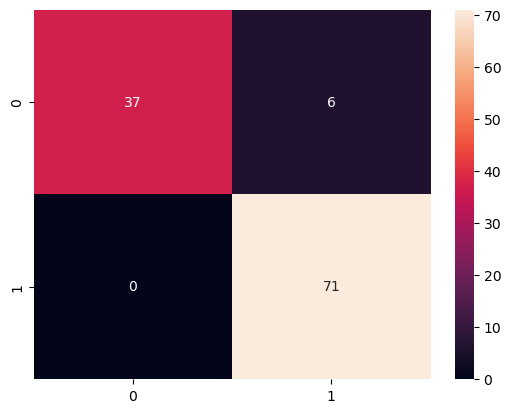

In [52]:
sns.heatmap(cm_svc,annot=True)

#### Description: SVM finds the hyperplane that best separates the classes. It is effective in high-dimensional spaces, making it suitable for this dataset with numerous features.

### 5. k-Nearest Neighbors (k-NN)

In [53]:
model_4 = KNeighborsClassifier(n_neighbors=5)
model_4.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = model_4.predict(X_test)

In [55]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.956140350877193

In [56]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Description: k-NN classifies data points based on the majority class among the k-nearest neighbors. It is simple and effective, although it can be sensitive to the scale of the data.

## 3. Model Comparison 

In [57]:
accuracies = {  
    'Logistic Regression': accuracy,  
    'Decision Tree': accuracy_dt,  
    'Random Forest': accuracy_rf,  
    'SVM': accuracy_svc,  
    'k-NN': accuracy_knn  
}  

In [58]:
for model, accuracy in accuracies.items():  
    print(f"{model}: {accuracy:.2f}")  

Logistic Regression: 0.98
Decision Tree: 0.92
Random Forest: 0.63
SVM: 0.95
k-NN: 0.96


In [59]:
best_model = max(accuracies, key=accuracies.get)  
worst_model = min(accuracies, key=accuracies.get) 

In [60]:
print(f"Best performing model: {best_model}")  
print(f"Worst performing model: {worst_model}")  

Best performing model: Logistic Regression
Worst performing model: Random Forest
